![logo](1_bDwEvCRgrKVbLrAXEixpfA.png)
___

##### import libraries

In [477]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

import functools as ft

#natural language processing
#pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vlad_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 3 - Analysis
    a) Importing data
    b) Duplicate data
    c) Null Data
    d) Success-Percentage Column
        - check for outliers
    e) Checking for other outliers
        - goals
        - converted_pledged_cmount
        - backers_count
    f) Natural Language Processing
        - cleaning blurb variable
            - punctuation
            - stopwords
            - lemmatization
        - writing and saving corpus

### a) Importing
##### Use 'cleaned_data.csv' to begin cleaning

In [391]:
#import .csv file
cleaned_df = pd.read_csv("cleaned_data.csv")

cleaned_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned_df.shape)
cleaned_df.head(1)

(149564, 21)


,id,name,genre,subgenre,category,source_url,blurb,slug,goal,converted_pledged_amount,...,launched_at,deadline,country,currency,backers_count,disable_communication,is_starrable,spotlight,staff_pick,state
0,498799566,"Strange Wit, an original graphic novel about J...",Graphic Novels,comics,"{""id"":252,""name"":""Graphic Novels"",""slug"":""comi...",https://www.kickstarter.com/discover/categorie...,"The true biography of the historical figure, w...",strange-wit-an-original-graphic-novel-about-ja...,12000,14740,...,2015-08-15 04:19:27,2015-09-14 04:19:27,US,USD,403,0,0,1,1,successful


### b) Checking for duplicate data

In [392]:
#total number of rows and columns
print('dataframe shape: ', cleaned_df.shape)

#rows containing duplicate data
duplicate_rows_df = cleaned_df[cleaned_df.duplicated()]

print('number of duplicate rows: ', duplicate_rows_df.shape)

dataframe shape:  (149564, 21)
number of duplicate rows:  (0, 21)


### c) Checking for null data

In [486]:
#finding the NaN values
print(cleaned_df.isnull().sum())

id                          0
name                        0
genre                       0
subgenre                    0
category                    0
source_url                  0
blurb                       0
slug                        0
goal                        0
converted_pledged_amount    0
created_at                  0
launched_at                 0
deadline                    0
country                     0
currency                    0
backers_count               0
disable_communication       0
is_starrable                0
spotlight                   0
staff_pick                  0
state                       0
success_percentage          0
dtype: int64


In [394]:
#locate the row in which the NaN value is present
null_columns=cleaned_df.columns[cleaned_df.isnull().any()]
print(cleaned_df[cleaned_df["blurb"].isnull()][null_columns])


       blurb
142327   NaN


In [395]:
#drop the row with NaN value
cleaned_df.drop(cleaned_df.index[142327], inplace=True)

#reset index
cleaned_df.reset_index(drop=True,inplace=True)

##### Counts for 'state' column

In [396]:
print(cleaned_df['state'].value_counts())
print('\n')
print('In our data, we have a good proportion of failed:successful campaigns \n so the steps below will explore these numbers in more detail in an attempt to filter our data.')

successful    93849
failed        55714
Name: state, dtype: int64


In our data, we have a good proportion of failed:successful campaigns 
 so the steps below will explore these numbers in more detail in an attempt to filter our data.


### d) Make a new column for success % (goal amount / pledged amount)

In [397]:
cleaned_df['success_percentage']=(cleaned_df['converted_pledged_amount'] / cleaned_df['goal']) * 100

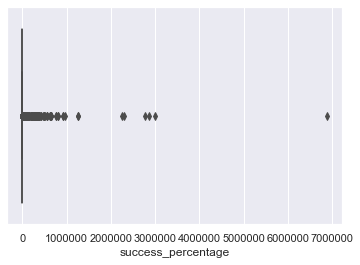

In [398]:
#make a boxplot of 'success_percentage' column
sns.boxplot(x=cleaned_df['success_percentage'])

In [399]:
#check range of 'success_percentage' column

bins = [0, 0.1, 0.2, 0.5, 1, 5, 10, 25, 50, 75, 100, 125, 150, 200, 300, 500, 1000, 2500, 5000, 7500, 10000, 100000, 1000000, np.inf]
success_bins = pd.cut(cleaned_df['success_percentage'], bins=bins).value_counts().sort_index()
print (success_bins)

(0.0, 0.1]                7978
(0.1, 0.2]                2290
(0.2, 0.5]                3677
(0.5, 1.0]                3423
(1.0, 5.0]                9581
(5.0, 10.0]               4893
(10.0, 25.0]              6966
(25.0, 50.0]              4360
(50.0, 75.0]              1456
(75.0, 100.0]             5570
(100.0, 125.0]           48737
(125.0, 150.0]           11371
(150.0, 200.0]            9165
(200.0, 300.0]            7086
(300.0, 500.0]            5039
(500.0, 1000.0]           3609
(1000.0, 2500.0]          2282
(2500.0, 5000.0]           635
(5000.0, 7500.0]           214
(7500.0, 10000.0]           79
(10000.0, 100000.0]        196
(100000.0, 1000000.0]       81
(1000000.0, inf]             9
Name: success_percentage, dtype: int64


In [402]:
#check left-outliers
print(cleaned_df[cleaned_df['success_percentage'].between(0, 5)]['state'].value_counts())
print('\n')
print('On the other hand, these campaigns were started with very high goals in mind and this is why they have such a \n low success percentage.')
print('\n')
print(cleaned_df[cleaned_df['success_percentage'].between(0, 5)]['goal'].value_counts())

failed        37812
successful        3
Name: state, dtype: int64


On the other hand, these campaigns were started with very high goals in mind and this is why they have such a 
 low success percentage.


5000       3485
10000      3119
50000      1612
15000      1594
20000      1556
           ... 
1450000       1
14355         1
98500         1
2261          1
64            1
Name: goal, Length: 1880, dtype: int64


In [411]:
#check outliers on the right extreme
print(cleaned_df[cleaned_df['success_percentage'].between(110, np.inf)]['state'].value_counts())
print('\n')
print('It is clear that most of these campaigns were started with very low goals in mind and this is why they have such a \n high success percentage.')
print('\n')
print(cleaned_df[cleaned_df['success_percentage'].between(110, np.inf)]['goal'].value_counts().sort_index())

successful    20706
Name: state, dtype: int64


It is clear that most of these campaigns were started with very low goals in mind and this is why they have such a 
 high success percentage.


4          1
8          1
9          1
10         6
12         2
          ..
700000     1
750000     1
1250000    2
1285000    1
1500000    1
Name: goal, Length: 972, dtype: int64


In [404]:
#remove left outliers
cleaned_df.drop(cleaned_df.loc[cleaned_df['success_percentage'].between(0, 5)].index, inplace=True)
cleaned_df.shape

(111748, 22)

In [412]:
#remove right outliers
cleaned_df.drop(cleaned_df.loc[cleaned_df['success_percentage'].between(110, np.inf)].index, inplace=True)
cleaned_df.shape

(54595, 22)

Our boxplot is starting to look more like a box now.


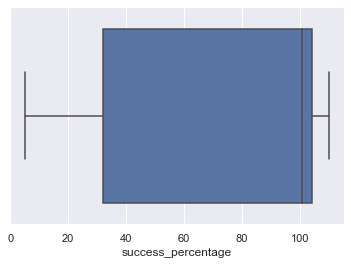

In [413]:
sns.boxplot(x=cleaned_df['success_percentage'])
print('Our boxplot is starting to look more like a box now.')

In [414]:
print(cleaned_df['state'].value_counts())

successful    36694
failed        17901
Name: state, dtype: int64


### e) Checking for other outliers

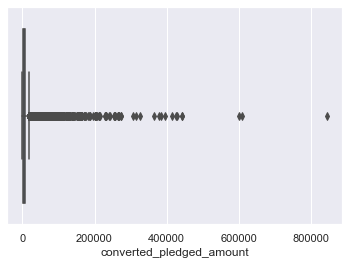

In [415]:
sns.boxplot(x=cleaned_df['converted_pledged_amount'])

In [416]:
#check range of 'converted_pledged_amount' column
bins = [0, 1, 5, 10, 50, 100, 2500, 5000, 10000, 25000, 35000, 50000, 75000, 100000, 125000, 500000, 1000000, 10000000, 15000000, np.inf]
pledged_bins = pd.cut(cleaned_df['converted_pledged_amount'], bins=bins).value_counts().sort_index()
print (pledged_bins)

(0.0, 1.0]                     42
(1.0, 5.0]                     38
(5.0, 10.0]                    91
(10.0, 50.0]                  909
(50.0, 100.0]                1254
(100.0, 2500.0]             21311
(2500.0, 5000.0]             9445
(5000.0, 10000.0]            9522
(10000.0, 25000.0]           8382
(25000.0, 35000.0]           1752
(35000.0, 50000.0]            763
(50000.0, 75000.0]            663
(75000.0, 100000.0]           180
(100000.0, 125000.0]          128
(125000.0, 500000.0]          112
(500000.0, 1000000.0]           3
(1000000.0, 10000000.0]         0
(10000000.0, 15000000.0]        0
(15000000.0, inf]               0
Name: converted_pledged_amount, dtype: int64


In [428]:
#check what the 'converted pledged amount' values below 100 reveal
print(cleaned_df[cleaned_df['converted_pledged_amount']<30]['state'].value_counts())
print('\n')
print('What we find is that most of these left-outliers are somewhat distributed between success/fail.')

failed        462
successful     92
Name: state, dtype: int64


What we find is that most of these left-outliers are somewhat distributed between success/fail.


In [437]:
#check what the 'converted pledged amount' values anove 50,000 reveal
print(cleaned_df[cleaned_df['converted_pledged_amount']>15000]['state'].value_counts())
print('\n')
print('What also find that most of these right-outliers are not evenly distributed between success/fail.')

successful    2182
failed         232
Name: state, dtype: int64


What also find that most of these right-outliers are not evenly distributed between success/fail.


In [438]:
#remove right outliers
cleaned_df.drop(cleaned_df.loc[cleaned_df['converted_pledged_amount'].between(15000, np.inf)].index, inplace=True)
cleaned_df.shape

(47104, 22)

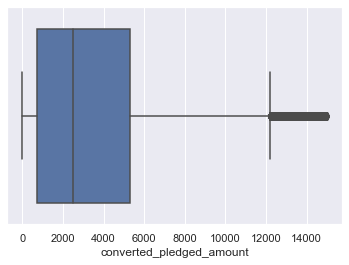

In [439]:
sns.boxplot(x=cleaned_df['converted_pledged_amount'])

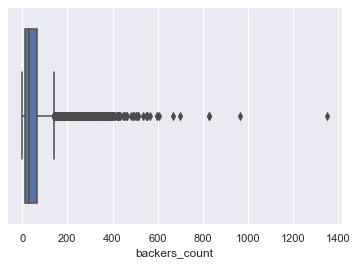

In [440]:
sns.boxplot(x=cleaned_df['backers_count'])

In [441]:
#check range of 'backers_count' column
bins = [0, 1, 10, 25, 50, 75, 100, 250, 300, 500, 1000, 3000, 5000, 10000, 50000, 110000, np.inf]
backers_bins = pd.cut(cleaned_df['backers_count'], bins=bins).value_counts().sort_index()
print (backers_bins)

(0.0, 1.0]               626
(1.0, 10.0]             9062
(10.0, 25.0]           10672
(25.0, 50.0]           10954
(50.0, 75.0]            6553
(75.0, 100.0]           3684
(100.0, 250.0]          5174
(250.0, 300.0]           194
(300.0, 500.0]           164
(500.0, 1000.0]           20
(1000.0, 3000.0]           1
(3000.0, 5000.0]           0
(5000.0, 10000.0]          0
(10000.0, 50000.0]         0
(50000.0, 110000.0]        0
(110000.0, inf]            0
Name: backers_count, dtype: int64


In [456]:
#check what the 'backers_count' values above 1,000 reveal
print(cleaned_df[cleaned_df['backers_count']>250]['state'].value_counts())
print('\n')
print('Since this row shows the number of backers for each campaign, it makes sense that the higher the number \n the more successful the campaign is. These outliers are somewhat distributed. \n ***Therefore no outlier removal for this variable.')

successful    322
failed         57
Name: state, dtype: int64


Since this row shows the number of backers for each campaign, it makes sense that the higher the number 
 the more successful the campaign is. These outliers are somewhat distributed. 
 ***Therefore no outlier removal for this variable.


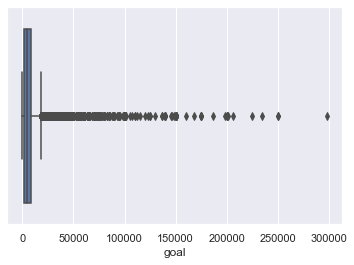

In [458]:
sns.boxplot(x=cleaned_df['goal'])

In [459]:
#check range of 'goal' column
bins = [0, 1.5, 2, 5, 10, 50, 100, 2500, 5000, 10000, 15000, 20000, 25000, 35000, 50000, 75000, 85000, 100000, 500000, 1000000, 10000000, 100000000, np.inf]
goal_bins = pd.cut(cleaned_df['goal'], bins=bins).value_counts().sort_index()
print (goal_bins)

(0.0, 1.5]                      34
(1.5, 2.0]                       1
(2.0, 5.0]                       6
(5.0, 10.0]                     29
(10.0, 50.0]                   193
(50.0, 100.0]                  364
(100.0, 2500.0]              17076
(2500.0, 5000.0]             12330
(5000.0, 10000.0]            10994
(10000.0, 15000.0]            3015
(15000.0, 20000.0]             941
(20000.0, 25000.0]             617
(25000.0, 35000.0]             612
(35000.0, 50000.0]             533
(50000.0, 75000.0]             192
(75000.0, 85000.0]              32
(85000.0, 100000.0]             79
(100000.0, 500000.0]            56
(500000.0, 1000000.0]            0
(1000000.0, 10000000.0]          0
(10000000.0, 100000000.0]        0
(100000000.0, inf]               0
Name: goal, dtype: int64


In [464]:
#check what the 'goal' values above 1,000,000 reveal- are the campaigns mostly failures?
print(cleaned_df[cleaned_df['goal']>15000]['state'].value_counts())
print('\n')
print('Clearly these are outliers and by looking at the rows and their [state] we can justify their removal from our data \n most of these campaigns are successful and must be sacrificed to maintain model accuracy.')


failed        3033
successful      29
Name: state, dtype: int64


Clearly these are outliers and by looking at the rows and their [state] we can justify their removal from our data 
 most of these campaigns are successful and must be sacrificed to maintain model accuracy.


In [465]:
#remove right outliers
cleaned_df.drop(cleaned_df.loc[cleaned_df['goal'].between(15000, np.inf)].index, inplace=True)
cleaned_df.shape

(43289, 22)

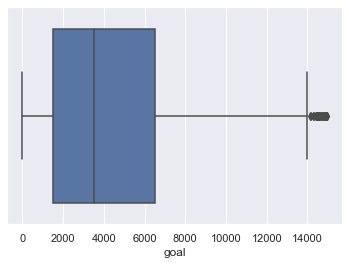

In [466]:
sns.boxplot(x=cleaned_df['goal'])

In [467]:
#reset index
cleaned_df.reset_index(drop=True,inplace=True)

### f) Natural Language Processing

##### Clean the first row to check

In [478]:
#create 'text' variable of every blurb description
text = pd.DataFrame(cleaned_df['blurb'])

#lets clean the first blurb as a first step
text['blurb'][0]

'THEMA Literary Society proposes to publish One Thing Done Superbly, the autumn 2011 issue of THEMA Literary Journal.'

In [479]:
#only keep letters and replace other symbols with a white space in the first blurb
blurb = re.sub('[^a-zA-Z]', ' ', text['blurb'][0])

#change letters to lower-case
blurb = blurb.lower()   

#split the first blurb which is a string into list
blurb = blurb.split()

#for loop to remove stop-words and to do lemmatization
wn = WordNetLemmatizer()
blurb = [wn.lemmatize(word) for word in blurb if not word in set(stopwords.words('english'))]

#join blurb back into a string from a list
blurb = ' '.join(blurb)

blurb

'thema literary society proposes publish one thing done superbly autumn issue thema literary journal'

### Clean the entire 'blurb' column

In [470]:
length = len(pd.DataFrame(cleaned_df['blurb']))

In [480]:
corpus = []
for i in range(0, length):
    #only keep letters and replace other symbols with a white space in the first blurb
    blurb = re.sub('[^a-zA-Z]', ' ', text['blurb'][i])

    #change letters to lower-case
    blurb = blurb.lower()   
    #split
    blurb = blurb.split()
    #for loop to remove stop-words and to do stemming
    wn = WordNetLemmatizer()
    blurb = [wn.lemmatize(word) for word in blurb if not word in set(stopwords.words('english'))]
    #join blurb back into a string from a list
    blurb = ' '.join(blurb)
    corpus.append(blurb)

In [481]:
#write corpus array into a dataframe and save it to a csv for importing into the Step 4 (Classification)
corpus_df = pd.DataFrame(corpus, columns = ['blurb'])
corpus_df.head()

,blurb
0,thema literary society proposes publish one th...
1,cnc crafted billet aluminum unique sophisticat...
2,genesis follows mother son live together forei...
3,losing fellow marine overseas sgt john casey d...
4,monster skulking dark king bent destroying lig...


### End of Step 3

In [482]:
#write corpus_df to a .csv
corpus_df.to_csv('corpus_data.csv')

In [483]:
#write cleaned cleaned_df to a .csv
cleaned_df.to_csv('cleaned2_data.csv')